In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv('Weather_Data.csv')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("First few rows of the dataset:")
print(data.head())

print("\nSummary statistics:")
print(data.describe())

print("\nMissing values:")
print(data.isnull().sum())








First few rows of the dataset:
       Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Tem

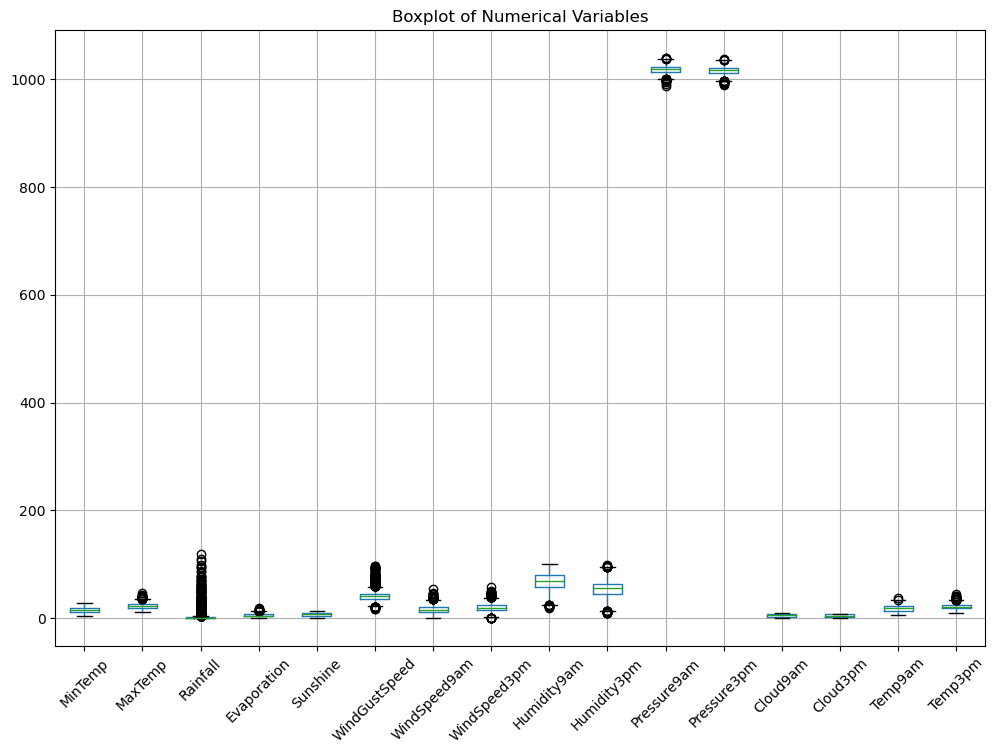

In [5]:
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

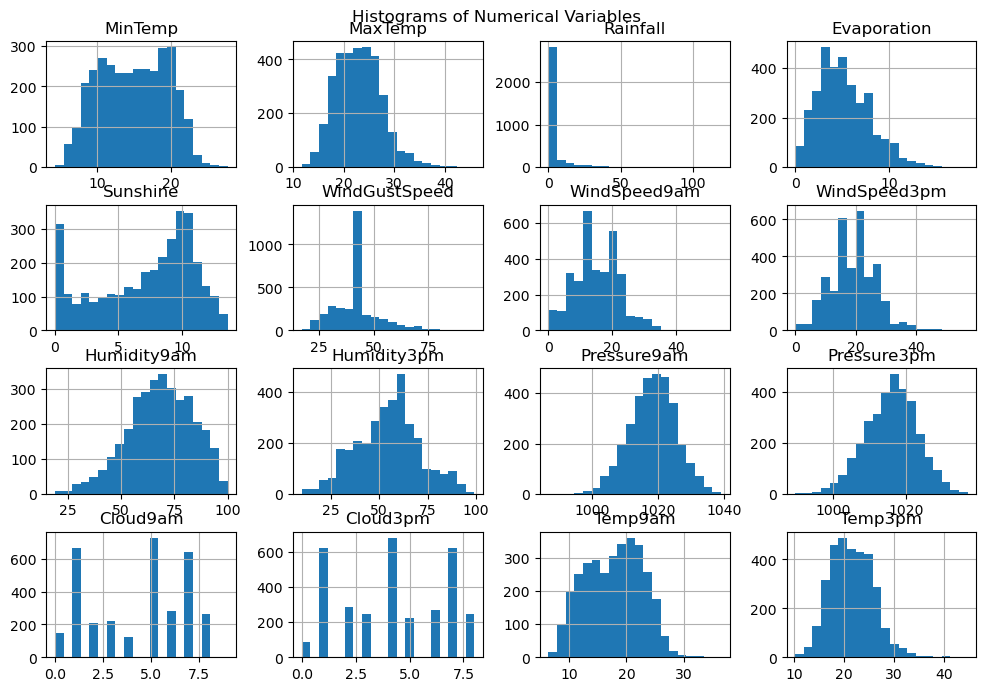

In [6]:

data.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Variables', y=0.92)
plt.show()


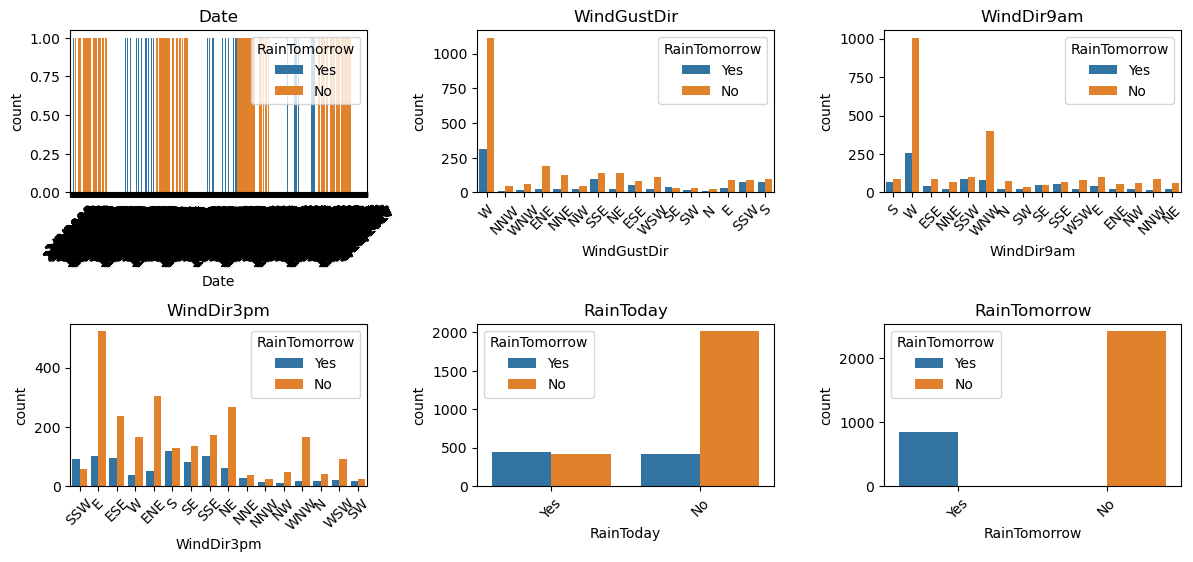

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.select_dtypes(include='object').columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=data, hue='RainTomorrow')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']]
y = data['RainTomorrow']  
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)



In [9]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Weather_Data.csv')
print(data.head())



X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']]
y = data['RainTomorrow']  
X = pd.get_dummies(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X, y)



       Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1017

RandomForestClassifier(random_state=42)

In [10]:

print("Please provide the following information:")
min_temp = float(input("Minimum Temperature: "))
max_temp = float(input("Maximum Temperature: "))
rainfall = float(input("Rainfall: "))
evaporation = float(input("Evaporation: "))
sunshine = float(input("Sunshine: "))
humidity_9am = float(input("Humidity 9am: "))
humidity_3pm = float(input("Humidity 3pm: "))
pressure_9am = float(input("Pressure 9am: "))
pressure_3pm = float(input("Pressure 3pm: "))
cloud_9am = float(input("Cloud 9am: "))
cloud_3pm = float(input("Cloud 3pm: "))
rain_today = input("Is it raining today? (Yes/No): ")


input_data = np.array([[min_temp, max_temp, rainfall, evaporation, sunshine, data['WindGustSpeed'].mean(),
                        humidity_9am, humidity_3pm, pressure_9am, pressure_3pm, cloud_9am, cloud_3pm]])


prediction = rf_classifier.predict(input_data)


predicted_label = encoder.inverse_transform(prediction)

print("Predicted Rainfall Tomorrow:", predicted_label[0])





Please provide the following information:


In [8]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='Yes')
recall = recall_score(y_test, y_pred, average='binary', pos_label='Yes')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='Yes')
conf_matrix = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8244274809160306
Precision: 0.7580645161290323
Recall: 0.5251396648044693
F1 Score: 0.6204620462046204
Confusion Matrix:
[[446  30]
 [ 85  94]]


In [9]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


data = pd.read_csv('Weather_Data.csv')
print(data.head())


X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']]
y = data['RainTomorrow']  
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_classifier = LogisticRegression(max_iter=1000)

logistic_classifier.fit(X_train, y_train)

y_pred = logistic_classifier.predict(X_test)




       Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1017

In [10]:

print("Please provide the following information:")
min_temp = float(input("Minimum Temperature: "))
max_temp = float(input("Maximum Temperature: "))
rainfall = float(input("Rainfall: "))
evaporation = float(input("Evaporation: "))
sunshine = float(input("Sunshine: "))
wind_gust_speed = float(input("Wind Gust Speed: "))  
humidity_9am = float(input("Humidity 9am: "))
humidity_3pm = float(input("Humidity 3pm: "))
pressure_9am = float(input("Pressure 9am: "))
pressure_3pm = float(input("Pressure 3pm: "))
cloud_9am = float(input("Cloud 9am: "))
cloud_3pm = float(input("Cloud 3pm: "))


input_data = np.array([[min_temp, max_temp, rainfall, evaporation, sunshine, wind_gust_speed,
                        humidity_9am, humidity_3pm, pressure_9am, pressure_3pm, cloud_9am, cloud_3pm]])

logistic_prediction = logistic_classifier.predict(input_data)
print("Logistic Regression Prediction:", logistic_prediction[0])


Please provide the following information:


Minimum Temperature:  19.5
Maximum Temperature:  22.3
Rainfall:  7.9
Evaporation:  6.2
Sunshine:  0.6
Wind Gust Speed:  88
Humidity 9am:  86
Humidity 3pm:  1008.8
Pressure 9am:  1004.8
Pressure 3pm:  1017.8
Cloud 9am:  5
Cloud 3pm:  7


Logistic Regression Prediction: Yes


C:\Users\diamo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label='Yes')
recall = recall_score(y_test, y_pred, average='binary', pos_label='Yes')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='Yes')

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Metrics:
Accuracy: 0.8122137404580153
Precision: 0.7121212121212122
Recall: 0.5251396648044693
F1 Score: 0.6045016077170418
Confusion Matrix:
[[446  30]
 [ 85  94]]
